# MiDaS

> [Towards Robust Monocular Depth Estimation: Mixing Datasets for Zero-shot Cross-dataset Transfer](https://arxiv.org/abs/1907.01341v3): Mixing Datasets for Zero-shot Cross-dataset Transfer
René Ranftl, Katrin Lasinger, David Hafner, Konrad Schindler, Vladlen Koltun

[MiDaS](https://pytorch.org/hub/intelisl_midas_v2/) was trained on up to 12 datasets (ReDWeb, DIML, Movies, MegaDepth, WSVD, TartanAir, HRWSI, ApolloScape, BlendedMVS, IRS, KITTI, NYU Depth V2) with multi-objective optimization. The original model that was trained on 5 datasets (MIX 5 in the paper) can be found [here](https://github.com/isl-org/MiDaS/releases/tag/v2). The figure below shows an overview of the different MiDaS models; the bubble size scales with number of parameters.

![MiDaS](../assets/Improvement_vs_FPS.webp)
[Source: isl-org/MiDaS](https://github.com/isl-org/MiDaS#readme)

In [ ]:
!pip install timm

In [2]:
import cv2
from glob import glob
import os
import torch
import urllib.request

import matplotlib.pyplot as plt

In [7]:
url, img0 = ("https://cdn.mos.cms.futurecdn.net/BDXBnh3ZCSf7poHQ9tNA3V-1200-80.jpg", "../assets/imgs/rocinante.jpg")
urllib.request.urlretrieve(url, img0)

('../assets/imgs/rocinante.jpg', <http.client.HTTPMessage at 0x7f3e6417fb20>)

In [8]:
url, img1 = ("https://4.bp.blogspot.com/-jt273nASXu0/WJJE314HO2I/AAAAAAABgn4/G51AvBYbrts6TMtlamYxB6AwXTL3sIyVQCLcB/s1600/the-expanse-season-2-image-1.jpg", "../assets/imgs/mcrn.jpg")
urllib.request.urlretrieve(url, img1)

('../assets/imgs/mcrn.jpg', <http.client.HTTPMessage at 0x7f3f5439b760>)

In [9]:
url, img2 = ("https://m.media-amazon.com/images/M/MV5BMGE5ZDNiZjQtN2UwZC00ZDczLWFkMzItMjg1NDllZDQ3OWQ4L2ltYWdlXkEyXkFqcGdeQXVyNTU4NjY5MzM@._V1_.jpg", "../assets/imgs/bar.jpg")
urllib.request.urlretrieve(url, img2)

('../assets/imgs/bar.jpg', <http.client.HTTPMessage at 0x7f3f5439b9a0>)

In [10]:
images = glob('../assets/imgs/*.jpg')

(-0.5, 1199.5, 674.5, -0.5)

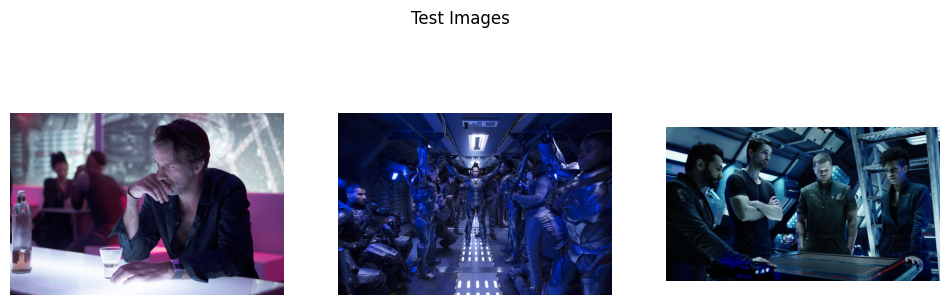

In [41]:
plt.figure(figsize=(12, 4))
plt.suptitle('Test Images')

ax = plt.subplot(1, 3, 1)
image = plt.imread(images[0])
plt.imshow(image, cmap=plt.cm.binary)
plt.axis(False)

ax = plt.subplot(1, 3, 2)
image = plt.imread(images[1])
plt.imshow(image, cmap=plt.cm.binary)
plt.axis(False)

ax = plt.subplot(1, 3, 3)
image = plt.imread(images[2])
plt.imshow(image, cmap=plt.cm.binary)
plt.axis(False)

`<model_type>` is chosen from:

* dpt_beit_large_512
* dpt_beit_large_384
* dpt_beit_base_384
* dpt_swin2_large_384
* dpt_swin2_base_384
* dpt_swin2_tiny_256
* dpt_swin_large_384
* dpt_next_vit_large_384
* dpt_levit_224
* dpt_large_384
* dpt_hybrid_384
* midas_v21_384
* midas_v21_small_256
* openvino_midas_v21_small_256

| MiDaS Model                                                                                                           | DIW </br><sup>WHDR</sup> | Eth3d </br><sup>AbsRel</sup> | Sintel </br><sup>AbsRel</sup> |   TUM </br><sup>δ1</sup> | KITTI </br><sup>δ1</sup> | NYUv2 </br><sup>δ1</sup> | $\color{green}{\textsf{Imp.}}$ </br><sup>%</sup> | Par.</br><sup>M</sup> | FPS</br><sup>&nbsp;</sup> |
|-----------------------------------------------------------------------------------------------------------------------|-------------------------:|-----------------------------:|------------------------------:|-------------------------:|-------------------------:|-------------------------:|-------------------------------------------------:|----------------------:|--------------------------:|
| **Inference height 512**                                                                                              |                          |                              |                               |                          |                          |                          |                                                  |                       |                           |
| [v3.1 BEiT<sub>L-512</sub>](https://github.com/isl-org/MiDaS/releases/download/v3_1/dpt_beit_large_512.pt)                                                                                     |                   0.1137 |                       0.0659 |                        0.2366 |                 **6.13** |                   11.56* |                **1.86*** |                     $\color{green}{\textsf{19}}$ |               **345** |                   **5.7** |
| [v3.1 BEiT<sub>L-512</sub>](https://github.com/isl-org/MiDaS/releases/download/v3_1/dpt_beit_large_512.pt)$\tiny{\square}$                                                                     |               **0.1121** |                   **0.0614** |                    **0.2090** |                     6.46 |                **5.00*** |                    1.90* |                     $\color{green}{\textsf{34}}$ |               **345** |                   **5.7** |
|                                                                                                                       |                          |                              |                               |                          |                          |                          |                                                  |                       |                           |
| **Inference height 384**                                                                                              |                          |                              |                               |                          |                          |                          |                                                  |                       |                           |
| [v3.1 BEiT<sub>L-512</sub>](https://github.com/isl-org/MiDaS/releases/download/v3_1/dpt_beit_large_512.pt)                                                                                     |                   0.1245 |                       0.0681 |                    **0.2176** |                 **6.13** |                    6.28* |                **2.16*** |                     $\color{green}{\textsf{28}}$ |                   345 |                        12 |
| [v3.1 Swin2<sub>L-384</sub>](https://github.com/isl-org/MiDaS/releases/download/v3_1/dpt_swin2_large_384.pt)$\tiny{\square}$                                                                    |                   0.1106 |                       0.0732 |                        0.2442 |                     8.87 |                **5.84*** |                    2.92* |                     $\color{green}{\textsf{22}}$ |                   213 |                        41 |
| [v3.1 Swin2<sub>B-384</sub>](https://github.com/isl-org/MiDaS/releases/download/v3_1/dpt_swin2_base_384.pt)$\tiny{\square}$                                                                    |                   0.1095 |                       0.0790 |                        0.2404 |                     8.93 |                    5.97* |                    3.28* |                     $\color{green}{\textsf{22}}$ |                   102 |                        39 |
| [v3.1 Swin<sub>L-384</sub>](https://github.com/isl-org/MiDaS/releases/download/v3_1/dpt_swin_large_384.pt)$\tiny{\square}$                                                                     |                   0.1126 |                       0.0853 |                        0.2428 |                     8.74 |                    6.60* |                    3.34* |                     $\color{green}{\textsf{17}}$ |                   213 |                        49 |
| [v3.1 BEiT<sub>L-384</sub>](https://github.com/isl-org/MiDaS/releases/download/v3_1/dpt_beit_large_384.pt)                                                                                     |                   0.1239 |                   **0.0667** |                        0.2545 |                     7.17 |                    9.84* |                    2.21* |                     $\color{green}{\textsf{17}}$ |                   344 |                        13 |
| [v3.1 Next-ViT<sub>L-384</sub>](https://github.com/isl-org/MiDaS/releases/download/v3_1/dpt_next_vit_large_384.pt)                                                                                 |               **0.1031** |                       0.0954 |                        0.2295 |                     9.21 |                    6.89* |                    3.47* |                     $\color{green}{\textsf{16}}$ |                **72** |                        30 |
| [v3.1 BEiT<sub>B-384</sub>](https://github.com/isl-org/MiDaS/releases/download/v3_1/dpt_beit_base_384.pt)                                                                                     |                   0.1159 |                       0.0967 |                        0.2901 |                     9.88 |                   26.60* |                    3.91* |                    $\color{green}{\textsf{-31}}$ |                   112 |                        31 |
| [v3.0 DPT<sub>L-384</sub>](https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt)        |                   0.1082 |                       0.0888 |                        0.2697 |                     9.97 |                     8.46 |                     8.32 |                      $\color{green}{\textsf{0}}$ |                   344 |                    **61** |
| [v3.0 DPT<sub>H-384</sub>](https://github.com/isl-org/MiDaS/releases/download/v3/dpt_hybrid_384.pt)       |                   0.1106 |                       0.0934 |                        0.2741 |                    10.89 |                    11.56 |                     8.69 |                    $\color{green}{\textsf{-10}}$ |                   123 |                        50 |
| [v2.1 Large<sub>384</sub>](https://github.com/isl-org/MiDaS/releases/download/v2_1/midas_v21_384.pt)       |                   0.1295 |                       0.1155 |                        0.3285 |                    12.51 |                    16.08 |                     8.71 |                    $\color{green}{\textsf{-32}}$ |                   105 |                        47 |
|                                                                                                                       |                          |                              |                               |                          |                          |                          |                                                  |                       |                           |
| **Inference height 256**                                                                                              |                          |                              |                               |                          |                          |                          |                                                  |                       |                           |
| [v3.1 Swin2<sub>T-256</sub>](https://github.com/isl-org/MiDaS/releases/download/v3_1/dpt_swin2_tiny_256.pt)$\tiny{\square}$                                                                    |               **0.1211** |                   **0.1106** |                    **0.2868** |                **13.43** |               **10.13*** |                **5.55*** |                    $\color{green}{\textsf{-11}}$ |                    42 |                        64 |
| [v2.1 Small<sub>256</sub>](https://github.com/isl-org/MiDaS/releases/download/v2_1/midas_v21_small_256.pt) |                   0.1344 |                       0.1344 |                        0.3370 |                    14.53 |                    29.27 |                    13.43 |                    $\color{green}{\textsf{-76}}$ |                **21** |                    **90** |
|                                                                                                                       |                          |                              |                               |                          |                          |                          |                                                  |                       |                           |
| **Inference height 224**                                                                                              |                          |                              |                               |                          |                          |                          |                                                  |                       |                           |
| [v3.1 LeViT<sub>224</sub>](https://github.com/isl-org/MiDaS/releases/download/v3_1/dpt_levit_224.pt)$\tiny{\square}$                                                                      |               **0.1314** |                   **0.1206** |                    **0.3148** |                **18.21** |               **15.27*** |                **8.64*** |                    $\color{green}{\textsf{-40}}$ |                **51** |                    **73** |


In [3]:
# Load a model
model_type = "DPT_Large"     # MiDaS v3 - Large (1.28GM) (highest accuracy, slowest inference speed)
# model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid (470M) (medium accuracy, medium inference speed)
# model_type = "MiDaS_small"  # MiDaS v2.1 - Small (82M) (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type, trust_repo=True)

Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt" to /root/.cache/torch/hub/checkpoints/dpt_large_384.pt
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.28G/1.28G [56:21<00:00, 407kB/s]


In [ ]:
# Use GPU if available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

In [6]:
# Use transforms to resize and normalize the image
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [19]:
# Apply transforms
img = cv2.imread(img0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

## Predictions

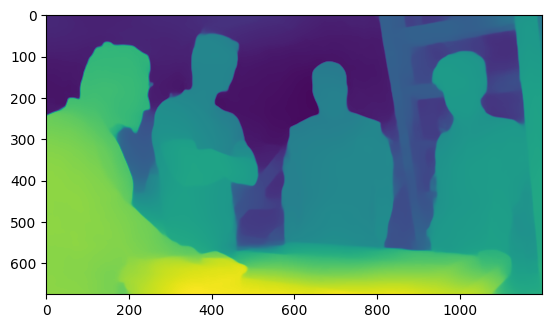

In [20]:
# Predict and resize to original resolution

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

# Show depth map
plt.imshow(output)
plt.show()

In [50]:
pred_imgs = glob('../assets/img*')

(-0.5, 551.5, 378.5, -0.5)

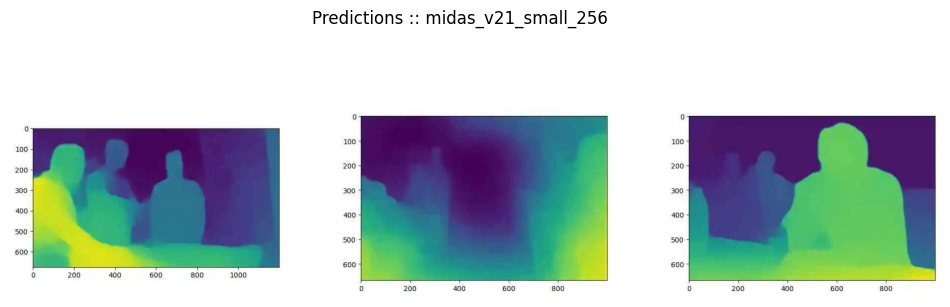

In [53]:
plt.figure(figsize=(12, 4))
plt.suptitle('Predictions :: midas_v21_small_256')

ax = plt.subplot(1, 3, 1)
img0pred = plt.imread(pred_imgs[0])
plt.imshow(img0pred, cmap=plt.cm.binary)
plt.axis(False)

ax = plt.subplot(1, 3, 2)
img1pred = plt.imread(pred_imgs[1])
plt.imshow(img1pred, cmap=plt.cm.binary)
plt.axis(False)

ax = plt.subplot(1, 3, 3)
img2pred = plt.imread(pred_imgs[2])
plt.imshow(img2pred, cmap=plt.cm.binary)
plt.axis(False)

In [63]:
pred_imgs = glob('../assets/img_m*')

(-0.5, 551.5, 378.5, -0.5)

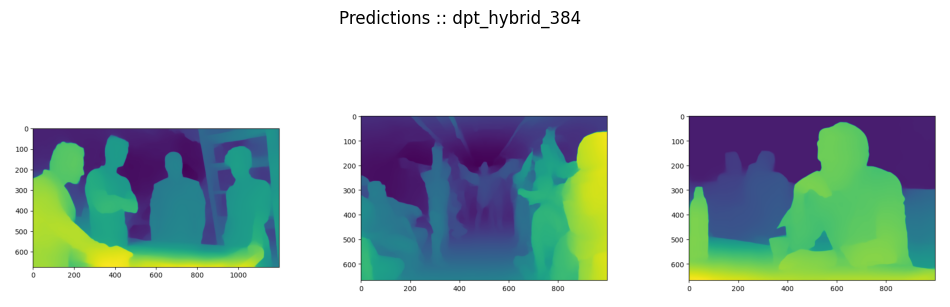

In [64]:
plt.figure(figsize=(12, 4))
plt.suptitle('Predictions :: dpt_hybrid_384')

ax = plt.subplot(1, 3, 1)
img0pred = plt.imread(pred_imgs[0])
plt.imshow(img0pred, cmap=plt.cm.binary)
plt.axis(False)

ax = plt.subplot(1, 3, 2)
img1pred = plt.imread(pred_imgs[1])
plt.imshow(img1pred, cmap=plt.cm.binary)
plt.axis(False)

ax = plt.subplot(1, 3, 3)
img2pred = plt.imread(pred_imgs[2])
plt.imshow(img2pred, cmap=plt.cm.binary)
plt.axis(False)

In [17]:
pred_imgs = glob('../assets/img_l*')

(-0.5, 551.5, 378.5, -0.5)

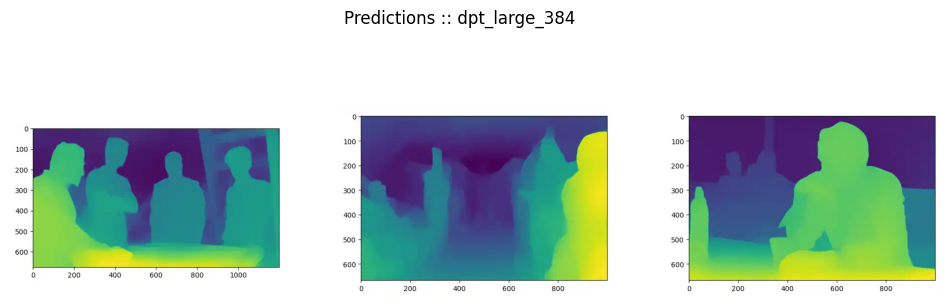

In [18]:
plt.figure(figsize=(12, 4))
plt.suptitle('Predictions :: dpt_large_384')

ax = plt.subplot(1, 3, 1)
img0pred = plt.imread(pred_imgs[0])
plt.imshow(img0pred, cmap=plt.cm.binary)
plt.axis(False)

ax = plt.subplot(1, 3, 2)
img1pred = plt.imread(pred_imgs[1])
plt.imshow(img1pred, cmap=plt.cm.binary)
plt.axis(False)

ax = plt.subplot(1, 3, 3)
img2pred = plt.imread(pred_imgs[2])
plt.imshow(img2pred, cmap=plt.cm.binary)
plt.axis(False)